# Set up the graph formats

In [4]:
import pylab
pylab.rcParams['xtick.major.pad']='8'
pylab.rcParams['ytick.major.pad']='8'
#pylab.rcParams['font.sans-serif']='Arial'

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)


from matplotlib.font_manager import FontProperties

panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

# Set up the data sets

In [5]:
from os import listdir
files = listdir('.')
if 'blackouts.txt' not in files:
    import urllib
    urllib.urlretrieve('https://raw.github.com/jeffalstott/powerlaw/master/manuscript/blackouts.txt', 'blackouts.txt')
if 'words.txt' not in files:
    import urllib
    urllib.urlretrieve('https://raw.github.com/jeffalstott/powerlaw/master/manuscript/words.txt', 'words.txt')
if 'worm.txt' not in files:
    import urllib
    urllib.urlretrieve('https://raw.github.com/jeffalstott/powerlaw/master/manuscript/worm.txt', 'worm.txt')

In [6]:
from numpy import genfromtxt
blackouts = genfromtxt('blackouts.txt')#/10**3
words = genfromtxt('words.txt')
worm = genfromtxt('worm.txt')
worm = worm[worm>0]

# Compare Log-binning to Linear-binning

[5, 5, 5, 3, 5, 7, 6, 5, 5, 4, 3, 4, 3, 3, 4, 4, 4, 5, 5, 5, 6, 4, 4, 5, 3, 4, 3, 4, 4, 2, 4, 5, 5, 5, 5, 6, 3, 4, 3, 3, 3, 4, 6, 4, 5, 2, 3, 3, 2, 2, 6, 3, 2, 4, 5, 4, 3, 3, 6, 5, 2, 3, 4, 4, 2, 3, 5, 4, 6, 4, 5, 5, 8, 3, 3, 5, 5, 2, 5, 3, 6, 4, 5, 5, 4, 5, 4, 3, 4, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2]


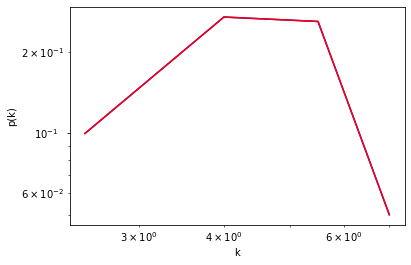

In [7]:
import powerlaw
import networkx as nx

#data = words
####
#G = watts_strogatz_graph(n, k, p, seed=None)

dataList = ""
G = nx.watts_strogatz_graph(100, 4, 0.5)

deg = G.degree()

data = [y for x,y in deg]
    
print(data)



figPDF = powerlaw.plot_pdf(data, color='b')
powerlaw.plot_pdf(data, linear_bins=False, color='r', ax=figPDF)
####
figPDF.set_ylabel("p(k)")
figPDF.set_xlabel(r"k")
figname = 'FigPDF'

#savefig(figname+'.tiff', bbox_inches='tight', dpi=300)

# Calculate the exponent

In [12]:
data = words
####
import powerlaw
fit = powerlaw.Fit(data)
fit.power_law.alpha
fit.power_law.sigma
print(fit.power_law.alpha)

2.023004831109283


Calculating best minimal value for power law fit
/Users/adamschilperoort/Desktop/Spring2020/CS499/cs499/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
